In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random

In [47]:
# list of elements with name as key and [total electrons, valence electrons] as value
elemList = {'C':[6,4],'N':[7,5],'O':[8,6],'P':[15,5],'S':[16,6]} # 'Si':[14,4],'Cl':[17,7]
components = "CNOPS"
# number of charges we are sampling through
chargeList = range(-2,3)
# number of H atoms we are sampling through
hList = range(0,5)
            
class ligand():
    def __init__(self, name, numberOfHs, charge):
        self.name = name
        self.charge = charge
        self.numberOfHs = numberOfHs
        self.numberOfEs = self.getNumE()
        self.getNumE()
        
    def print_name(self):
        print(self.name)
    
    def print_charge(self):
        print(self.charge)
    
    def print_numberOfHs(self):
        print(self.numberOfHs)
    
    # CHARGES
    def setCharge(self,charge):
        self.charge = charge
        self.getNumE()
        
    def incrCharge(self):
        self.charge += 1
        self.getNumE()
        
    def decrCharge(self):
        self.charge -= 1
        self.getNumE()
        
    # HYDROGENS    
    def setH(self, number):
        self.numberOfHs = number
        self.getNumE()
    
    def addH(self):
        self.numberOfHs += 1
        self.getNumE()
        
    def rmH(self):
        self.numberOfHs -= 1
        self.getNumE()
        
    def getNumE(self):
        self.numValE = elemList[self.name][1]
        self.numE = elemList[self.name][0]
        mod = self.numberOfHs - self.charge
        self.numValE += mod
        self.numE += mod
        
    def getSmiles(self):
        """Generates a SMILES string. The first row adds hydrogen and the second row charges"""
        self.SMILES =  "[" + self.name + "".join(["H" for i in range(0,self.numberOfHs)]) 
        self.SMILES += "".join(["+" if self.charge > 0  else "-" for i in range(0,abs(self.charge))]) + "]"
    
    def testOctetRule(self):
        """Test whether a mono-heavy-atom ligand fulfills the octet rule. Results < 8 means that there are 
        too many electrons, result > 8 means that there are not enough electrons."""
        result = 8 - self.numValE
        return(result)
    
    def testValenceShell(self):
        """Since open shell complexes are difficult to converge in DFT, we restrict ourselves to closed shell ones."""
        result =  int(not self.numValE%2)
        return(result)
        
    def score(self):
        """The health score helps to prune the full enumeration by setting open shell ligands to zero and 
        weights ligands with negative charge more than ligands with positive charge. Greater is better in this
        score."""
        score = self.testValenceShell()*(10-(-1.5*self.testOctetRule() if self.testOctetRule() < 0 else self.testOctetRule()))
        return(score)
    
    

In [48]:
# generate exhaustive output list for mono-ligands
outputList = list()
for elem in elemList.keys():
    for charge in chargeList:
        l = ligand(elem, 0, 0)
        l.setCharge(charge)
        for h in hList:
            if h:
                l.addH()
            l.getSmiles()
            outputList.append([l.SMILES,l.numE,l.numValE,l.charge,l.testOctetRule(),l.testValenceShell(),l.score()])
    

In [53]:
class dualLigand():
    def __init__(self, atom1, atom2):
        self.atom1 = atom1 
        self.atom2 = atom2 
    def updateValence(self):
        v1 = self.atom1.numValE
        v2 = self.atom2.numValE
#         if v1==v2 and v1==7:
#             self.atom1.updateValence(1)
#             self.atom2.updateValence(1)
#         if v1==v2 and v1==6:
#             self.atom1.updateValence(2)
#             self.atom2.updateValence(2)

#print([''.join(x) for x in itertools.product('CHNPOS', repeat=2)])

# generate exhaustive output list for di-ligands
outputListDi = list()
for elem1 in elemList.keys():
    for elem2 in elemList.keys():
        for charge1 in chargeList:
            for charge2 in chargeList:
                for h1 in hList:
                    for h2 in hList: 
                        l1 = ligand(elem1, 0, 0)
                        l1.setCharge(charge1)
                        l1.setH(h1)
                        l2 = ligand(elem2, 0, 0)
                        l2.setCharge(charge2)
                        l2.setH(h2)
                        
                        l1.getSmiles()
                        l2.getSmiles()
                        outputListDi.append([l1.SMILES,l1.numE,l1.numValE,l1.charge, \
                                           l1.testOctetRule(),l1.testValenceShell(),l1.score(),\
                                           l2.SMILES,l2.numE,l2.numValE,l2.charge, \
                                           l2.testOctetRule(),l2.testValenceShell(),l2.score()])
    
    
diligand = dualLigand(ligand("C", 4, 0), ligand("C", 4, 0))
diligand.updateValence()

outputListDi

for line in outputListDi:
    line[]

[['[C--]', 8, 6, -2, 2, 1, 8, '[C--]', 8, 6, -2, 2, 1, 8],
 ['[C--]', 8, 6, -2, 2, 1, 8, '[CH--]', 9, 7, -2, 1, 0, 0],
 ['[C--]', 8, 6, -2, 2, 1, 8, '[CHH--]', 10, 8, -2, 0, 1, 10],
 ['[C--]', 8, 6, -2, 2, 1, 8, '[CHHH--]', 11, 9, -2, -1, 0, 0.0],
 ['[C--]', 8, 6, -2, 2, 1, 8, '[CHHHH--]', 12, 10, -2, -2, 1, 7.0],
 ['[CH--]', 9, 7, -2, 1, 0, 0, '[C--]', 8, 6, -2, 2, 1, 8],
 ['[CH--]', 9, 7, -2, 1, 0, 0, '[CH--]', 9, 7, -2, 1, 0, 0],
 ['[CH--]', 9, 7, -2, 1, 0, 0, '[CHH--]', 10, 8, -2, 0, 1, 10],
 ['[CH--]', 9, 7, -2, 1, 0, 0, '[CHHH--]', 11, 9, -2, -1, 0, 0.0],
 ['[CH--]', 9, 7, -2, 1, 0, 0, '[CHHHH--]', 12, 10, -2, -2, 1, 7.0],
 ['[CHH--]', 10, 8, -2, 0, 1, 10, '[C--]', 8, 6, -2, 2, 1, 8],
 ['[CHH--]', 10, 8, -2, 0, 1, 10, '[CH--]', 9, 7, -2, 1, 0, 0],
 ['[CHH--]', 10, 8, -2, 0, 1, 10, '[CHH--]', 10, 8, -2, 0, 1, 10],
 ['[CHH--]', 10, 8, -2, 0, 1, 10, '[CHHH--]', 11, 9, -2, -1, 0, 0.0],
 ['[CHH--]', 10, 8, -2, 0, 1, 10, '[CHHHH--]', 12, 10, -2, -2, 1, 7.0],
 ['[CHHH--]', 11, 9, -2, -1

In [18]:


# create list of isoelectronic ligands and ve-isoelectronig ligands (ligands that have the same amount of VE)
isoList = []  
veList = []
score = []
for line in outputList:
    isoList.append(line[1]) # unsorted list of the total amount of e
    veList.append(line[2]) # unsorted list of the amount of VE
    score.append(line[-1])

isoLigands = {} # dictionary of ligands with key: number of electrons, values: the whole output
d = dict()
for i in np.unique(isoList):
    d[i] = []

for line in outputList:
    d[line[1]].append(line)

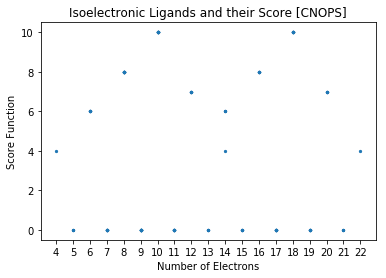

In [19]:
# plot of score function vs number of total electrons. It seems like the number of electrons determines the score fullz.
plt.scatter(isoList, score, s = 5)
plt.xlabel('Number of Electrons')
plt.ylabel('Score Function')
plt.title('Isoelectronic Ligands and their Score ['+ components + "]")
plt.xticks(np.unique(isoList))
plt.savefig('score_iso_ligands_' + components + ".pdf", bbox_inches='tight')


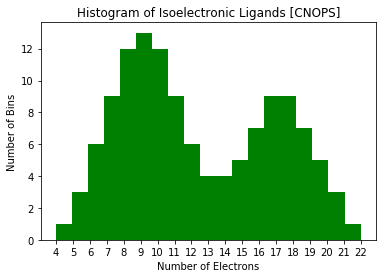

In [313]:
# plot the number of ligands sorted by the number of electrons (isoelectronic structures)

numBins = len(np.unique(isoList))

plt.hist(isoList, bins = numBins, facecolor='green')
plt.xlabel('Number of Electrons')
plt.ylabel('Number of Bins')
plt.title('Histogram of Isoelectronic Ligands ['+ components + "]")
plt.xticks(np.unique(isoList))
plt.savefig('hist_iso_ligands_' + components + ".pdf", bbox_inches='tight')
plt.show()


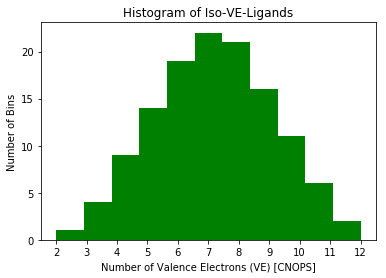

In [314]:
# plot the number of ligands sorted by the number of VE (VE-isoelectronic structures)

numBins = len(np.unique(veList))

plt.hist(veList, bins = numBins, facecolor='green')
plt.xlabel('Number of Valence Electrons (VE) ['+ components + "]")
plt.ylabel('Number of Bins')
plt.title('Histogram of Iso-VE-Ligands')
plt.xticks(np.unique(veList))
plt.savefig('hist_isove_ligands_' + components + ".pdf", bbox_inches='tight')
plt.show()


In [89]:
for elem in elemList:
    for charge in chargeList:
        for h in hList:
            numberOfEs = elemList.get(elem) + charge + h
            l = ligand(elem, h, charge, numberOfEs)
            l.numValE


TypeError: can only concatenate list (not "int") to list

In [23]:
from molSimplify.Classes.mol3D import * #import the mol3D class
path = '/Users/adityanandy/Desktop/ni_2_acac_2_ammonia_1_hydroxyl_1_s_2'
my_mol = mol3D() #Assign the mol3D class in local frame
my_mol.readfromxyz(path) # Look at specified XYZ File
metal_ind = my_mol.findMetal()[0] # Obtain index from metal list
bonded_atoms = my_mol.getBondedAtoms(metal_ind) #Check what's bonded to that metal
metal_coord = my_mol.getAtomCoords(metal_ind)
bondlengths = []
for i in bonded_atoms:
    connect_coord = my_mol.getAtomCoords(i)
    dist = distance(metal_coord,connect_coord)
    bondlengths.append(dist) #store in list
    print('The bond length between the metal and atom '+str(i)+' is '+str(dist)+' Angstrom.')

SyntaxError: invalid syntax (<ipython-input-23-b31a06ad6f59>, line 1)